## STEP 2 Smart Drawing
#### Data Set
###### BY NJ Namju Lee / nj.namju@gmail.com

* 

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
print('keras',keras.__version__);

from sklearn.model_selection import train_test_split

keras 2.5.0


In [21]:
# for google colab
from google.colab import drive 
drive.mount('/content/gdrive')
pathFileName = "gdrive/My Drive/njs-python-core/Workshop/SmartDrawing/data/vector/vectorData.csv";
# df=pd.read_csv('pathFileName')
dataSet = np.loadtxt(pathFileName, delimiter=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
# import prepared data
dataSet = np.loadtxt( 'data/vector/vectorData.csv', delimiter=',')
classLabel = [ (0, 'CIRCLE'), 
        (1, 'TRI-GON'),
        (2, 'ARROW_SINGLE'),
        (3, 'ARROW_DOUBLE'),
        (4, 'RECTANGLE'),
        (5, 'TEXT_LEADERLINE'),
        (6, 'CURVE'),
        (7, 'HEART'),
        (8, 'CLOUD')]
print ("class: " , classLabel[1])

class:  (1, 'TRI-GON')


In [3]:
# print dimension of data(dot product and class)
Y = dataSet[:,-1:]
X = dataSet[:,:-1]
print('dim class: ', Y.shape)
print('dim mat: ', X.shape)

dim class:  (530, 1)
dim mat:  (530, 501)


In [4]:
### Functions for fitting and evaluating multiple linear regression
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

In [5]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# dataCSV = np.loadtxt("./data/smartDrawingTrainData.csv", delimiter=',')  # , skiprows=1

In [6]:
np.random.shuffle(dataSet)
npData = dataSet;
testSize = 0.90

print(npData)

trainLength =  npData.shape[1]-1
XMat = npData[:,0 : trainLength]
yMat = npData[:,trainLength]
    
X_train, X_test, Y_train, Y_test = train_test_split(XMat, yMat, test_size=testSize, random_state=0)

[[-1.         -1.         -1.         ... -0.11527086  0.6
   4.        ]
 [-1.         -1.         -1.         ... -0.99182587  1.1
   0.        ]
 [ 0.          0.          0.         ... -0.8835464   1.
   3.        ]
 ...
 [-1.         -1.         -1.         ...  0.84105101  0.8
   5.        ]
 [ 0.          0.          0.         ... -0.56736799  1.7
   8.        ]
 [ 1.          1.          1.         ... -0.91030703  0.6
   4.        ]]


In [7]:
# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(X_train, Y_train)
# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, X_test, Y_test)

print('R^2 score on test set:', r_squared)
# http://math7.tistory.com/123

R^2 score on test set: -4.649588505506359


In [ ]:
# https://en.wikipedia.org/wiki/Logistic_regression

In [15]:
from sklearn.linear_model import LogisticRegression
clf_logi_l2 =  LogisticRegression(penalty='l2')
clf_logi_l2.fit(X_train, Y_train)

c:\Users\namju\miniconda3\envs\tf-gpu-2021\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print(clf_logi_l2.coef_)
print(clf_logi_l2.intercept_)

[[-0.10078649 -0.09718628 -0.09358607 ... -0.01477053 -0.00887942
   0.0854023 ]
 [ 0.23803503  0.22577227  0.21350951 ... -0.00783442  0.01695715
  -0.19640645]
 [-0.01292567 -0.00904789 -0.00517011 ...  0.11208335  0.14706079
  -0.25053912]
 ...
 [-0.06603658 -0.06619888 -0.06636117 ... -0.09470312 -0.11384864
   0.22483236]
 [ 0.01661474  0.01781493  0.01901511 ... -0.03469334 -0.03488322
   0.05296312]
 [-0.08377321 -0.07496881 -0.06616442 ...  0.08839787  0.08902718
   0.21554521]]
[-3.03323066  0.97297319  2.59139271 -1.57078504  3.07581054 -0.13190544
  1.295431   -2.08093737 -1.11874892]


In [17]:
index = 20
pred_logistic = clf_logi_l2.predict([X_test[index]])
print(pred_logistic, Y_test[index])

[1.] 1.0


In [18]:
pred_proba = clf_logi_l2.predict_proba([X_test[index]])
print(pred_proba)

[[3.40100648e-05 9.76636167e-01 1.94487803e-03 5.26846818e-05
  1.66612815e-03 5.92019327e-07 1.89451897e-02 2.54776766e-06
  7.17802552e-04]]


In [19]:
from sklearn.metrics import classification_report
pred_logistic = clf_logi_l2.predict(X_test)
class_report = classification_report(Y_test, pred_logistic)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.53      0.84      0.65        55
         1.0       0.41      0.42      0.42        74
         2.0       0.56      0.62      0.59        71
         3.0       1.00      0.12      0.22        32
         4.0       0.30      0.41      0.34        74
         5.0       0.28      0.44      0.34        41
         6.0       0.00      0.00      0.00        43
         7.0       0.87      0.82      0.84        33
         8.0       1.00      0.31      0.48        54

    accuracy                           0.45       477
   macro avg       0.55      0.44      0.43       477
weighted avg       0.52      0.45      0.44       477



class:  (1, 'TRI-GON')


In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred_logistic = clf_logi_l2.predict(X_test)

# # 정밀도
# precision = precision_score(Y_test, pred_logistic)
# print(precision)

# confusion matrix
conf_matrix = confusion_matrix(Y_test, pred_logistic)
print(conf_matrix)


[[46  2  2  0  5  0  0  0  0]
 [12 31  4  0  9 17  0  1  0]
 [ 0  0 44  0 20  3  3  1  0]
 [ 0  3  3  4 19  1  2  0  0]
 [15 18  5  0 30  5  1  0  0]
 [ 4  5  0  0  3 18 10  1  0]
 [ 1  7  9  0  8 17  0  1  0]
 [ 6  0  0  0  0  0  0 27  0]
 [ 3  9 12  0  6  3  4  0 17]]


[[6.34716483e-01 2.98759175e-02 8.20736408e-02 ... 5.10714392e-03
  1.67477865e-01 3.27812501e-02]
 [1.88022548e-05 9.59936656e-01 3.91421718e-03 ... 3.36529715e-02
  2.28524074e-06 4.38887461e-04]
 [5.71745952e-06 1.95204814e-06 8.14631705e-04 ... 6.29378185e-05
  1.04299240e-05 1.44306240e-04]
 ...
 [1.42336336e-06 1.67538757e-02 3.49476839e-01 ... 1.22660224e-01
  3.49920542e-02 2.21769026e-02]
 [1.18813159e-09 2.10065968e-10 1.88271286e-04 ... 5.42087353e-07
  1.60006689e-07 2.64666294e-07]
 [5.16843789e-07 1.82388207e-08 1.55517704e-03 ... 9.56844818e-02
  1.60294286e-07 1.44488196e-04]]


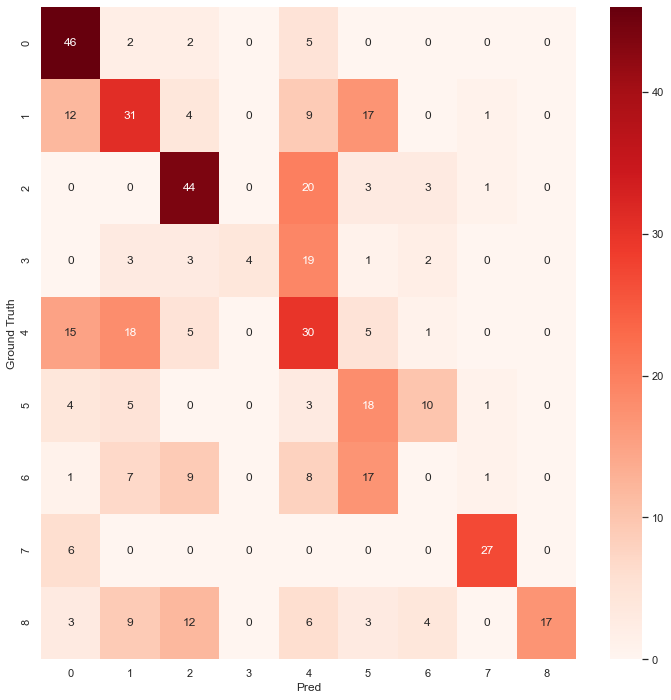

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

import seaborn as sns
sns.set(style='dark')

yTestYOnehot = to_categorical(Y_test)
pred_proba = clf_logi_l2.predict_proba(X_test)
plt.figure(figsize=(12,12))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(pred_proba, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()